In [15]:
# importing modules
import numpy as np
import pandas as pd

In [16]:
# open the file in format csv (Comma-separated values)
dataset = pd.read_csv("/home/andre/Desktop/Rede neural/dataset.csv")

In [17]:
# show the first five registers
dataset.head()

,date,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov,open,high,low,close,adjclose,volume,ticker
0,2011-01-01,Uptrend,0.83,10.943548,"132,66","106,1","163,71","1,67411428571429",1525.61,66575,9.264964,9.492898,7.756332,7.936712,6.187788,149128856,LREN3.SA
1,2011-02-01,Uptrend,0.80,11.250000,"136,18","111,4","166,17","1,66719",1533.05,67383,8.033461,8.736943,7.756332,8.363064,6.520191,120569757,LREN3.SA
2,2011-03-01,Uptrend,0.79,11.717742,"144,93","105,3","162,43","1,6583",1629.59,68587,8.364704,9.059987,8.140049,8.672990,6.761821,106565665,LREN3.SA
3,2011-04-01,Uptrend,0.77,11.800000,"139,89","108,5","163,01","1,58564736842105",1672.59,66133,8.672990,9.660159,8.625435,9.519135,7.440604,87893355,LREN3.SA
4,2011-05-01,Uptrend,0.47,12.000000,"143,23","106,4","155,6","1,61269090909091",1636.41,64620,9.512576,9.819222,8.896005,9.814302,7.843419,108838470,LREN3.SA


In [18]:
# Replace the comma by or periods 
dataset['IBC-Br'] = [float(str(i).replace(",", ".")) for i in dataset['IBC-Br']]
dataset['icom'] = [float(str(i).replace(",", ".")) for i in dataset['icom']]
dataset['expectativa'] = [float(str(i).replace(",", ".")) for i in dataset['expectativa']]
dataset['dolar'] = dataset['dolar'].str.replace(',','.')

In [19]:
# Get the close of the stock price
fechamento = dataset['close']

In [20]:
# Prints information about the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         132 non-null    object 
 1   trend        132 non-null    object 
 2   ipca         132 non-null    float64
 3   selic        132 non-null    float64
 4   IBC-Br       132 non-null    float64
 5   icom         132 non-null    float64
 6   expectativa  132 non-null    float64
 7   dolar        132 non-null    object 
 8   icon         132 non-null    float64
 9   ibov         132 non-null    int64  
 10  open         132 non-null    float64
 11  high         132 non-null    float64
 12  low          132 non-null    float64
 13  close        132 non-null    float64
 14  adjclose     132 non-null    float64
 15  volume       132 non-null    int64  
 16  ticker       132 non-null    object 
dtypes: float64(11), int64(2), object(4)
memory usage: 17.7+ KB


In [21]:
# As the dollar was obtained using the resampling function, this column['dolar'] remains as an object. Then this error occurs:
# ValueError: array must not contain infs or NaNs
# Therefore, I used this line below to solve it. 
dataset['dolar'] = dataset['dolar'].astype(float) # converting to float

In [22]:
# Correlations

In [23]:
from scipy.stats import pearsonr

In [24]:
indices = ['IPCA', 'Selic','IBC-Br','ICOM', 'expectativa', 'dolar', 'icon', 'ibov']

for x in range(0, len(indices)):   
    l=2+x
    corr, _ = pearsonr(dataset['close'], dataset.iloc[:,l])
    print(indices[x], 'Pearsons correlation: %.3f' % corr)

IPCA Pearsons correlation: -0.174
Selic Pearsons correlation: -0.704
IBC-Br Pearsons correlation: -0.430
ICOM Pearsons correlation: -0.090
expectativa Pearsons correlation: -0.176
dolar Pearsons correlation: 0.782
icon Pearsons correlation: 0.924
ibov Pearsons correlation: 0.873


In [25]:
# Data visualization of different indicators 

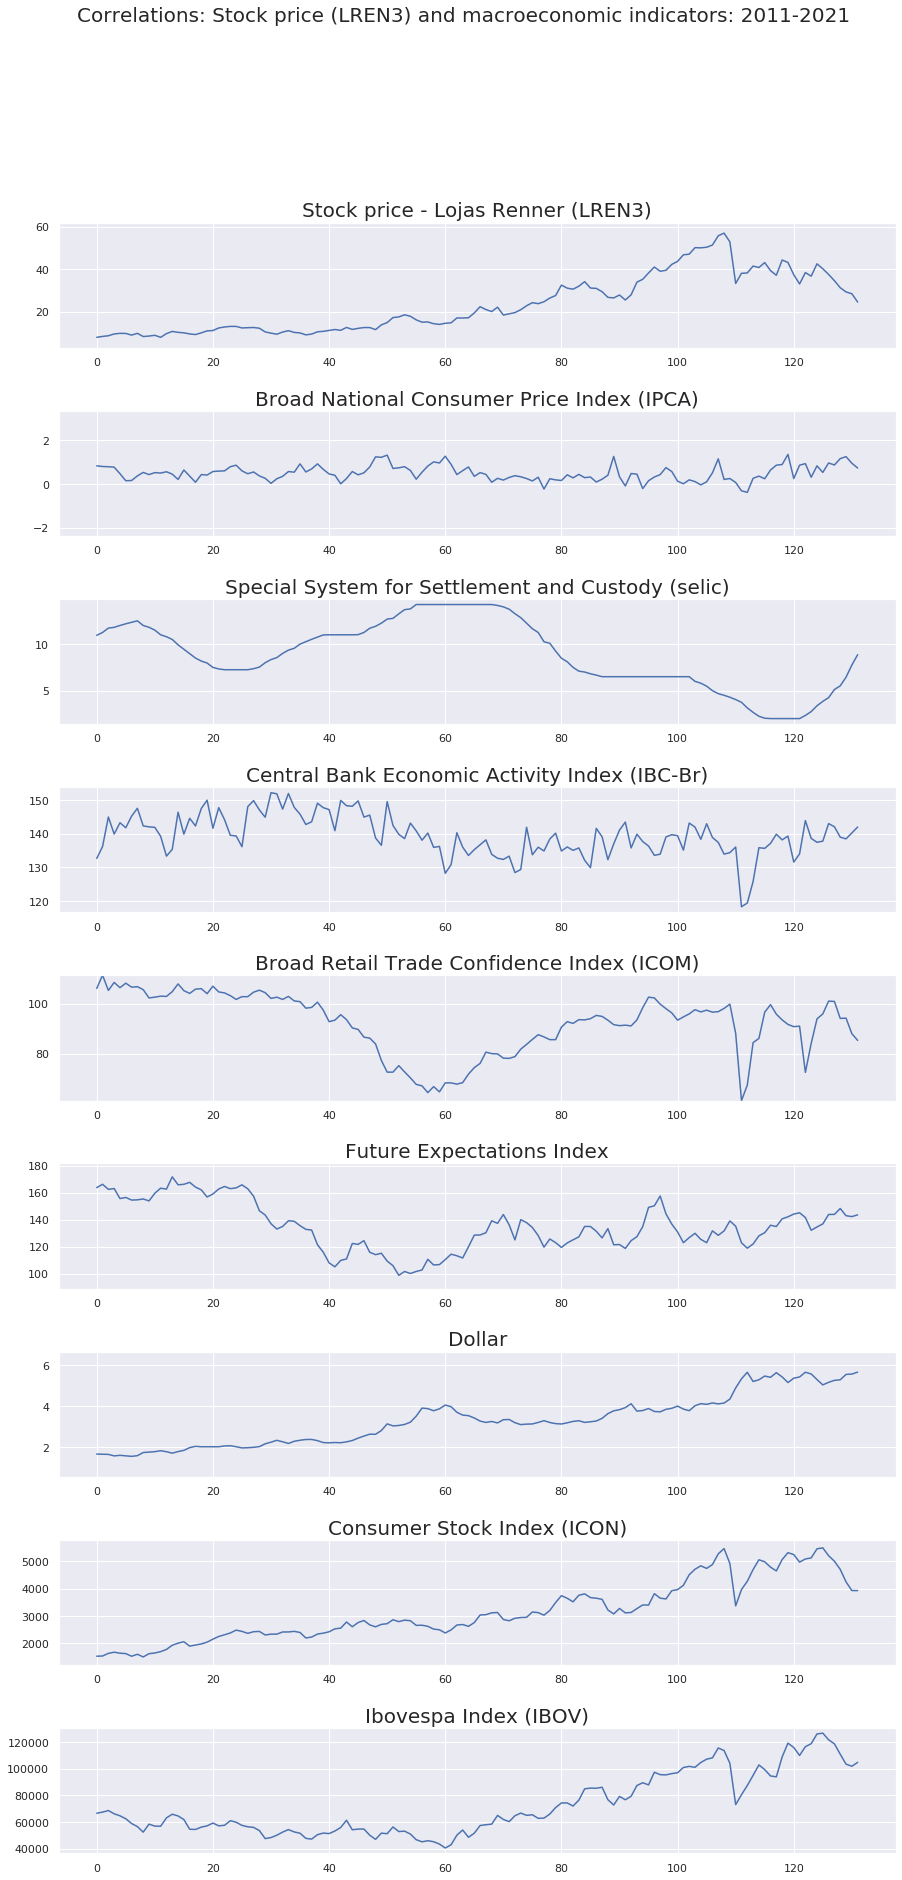

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

fig, axes = plt.subplots(9, 1, figsize=(15, 30), sharey='row') # problem was sharey=True
fig.suptitle('Correlations: Stock price (LREN3) and macroeconomic indicators: 2011-2021',  
             fontsize = 20)

sns.lineplot(ax=axes[0], x=dataset.index, y=dataset['close'].values)
axes[0].set_title('Stock price - Lojas Renner (LREN3)')  
axes[0].set_ylim(dataset['close'].min()-5, dataset['close'].max()+5)
axes[0].title.set_size(20) # Adjust the font size of the title

sns.lineplot(ax=axes[1], x=dataset.index, y=dataset['ipca'].values)
axes[1].set_title('Broad National Consumer Price Index (IPCA)')  
axes[1].set_ylim(dataset['ipca'].min()-2, dataset['ipca'].max()+2)
axes[1].title.set_size(20) 

sns.lineplot(ax=axes[2], x=dataset.index, y=dataset['selic'].values)
axes[2].set_title('Special System for Settlement and Custody (selic)')
axes[2].title.set_size(20) 

sns.lineplot(ax=axes[3], x=dataset.index, y=dataset['IBC-Br'].values)
axes[3].set_title('Central Bank Economic Activity Index (IBC-Br)')
axes[3].title.set_size(20) 

sns.lineplot(ax=axes[4], x=dataset.index, y=dataset['icom'].values)
axes[4].set_title('Broad Retail Trade Confidence Index (ICOM)')  
axes[4].set_ylim(dataset['icom'].min(), dataset['icom'].max())
axes[4].title.set_size(20) 

sns.lineplot(ax=axes[5], x=dataset.index, y=dataset['expectativa'].values)
axes[5].set_title('Future Expectations Index')  
axes[5].set_ylim(dataset['expectativa'].min()-10, dataset['expectativa'].max()+10)
axes[5].title.set_size(20) 

sns.lineplot(ax=axes[6], x=dataset.index, y=dataset['dolar'].values)
axes[6].set_title('Dollar')  
axes[6].set_ylim(dataset['dolar'].min()-1, dataset['dolar'].max()+1)
axes[6].title.set_size(20) 

sns.lineplot(ax=axes[7], x=dataset.index, y=dataset['icon'].values)
axes[7].set_title('Consumer Stock Index (ICON)')  
axes[7].set_ylim(dataset['icon'].min()-300, dataset['icon'].max()+300)
axes[7].title.set_size(20) 

sns.lineplot(ax=axes[8], x=dataset.index, y=dataset['ibov'].values)
axes[8].set_title('Ibovespa Index (IBOV)')  
axes[8].set_ylim(dataset['ibov'].min()-4000, dataset['ibov'].max()+4000)
axes[8].title.set_size(20) 

# Space between the figures
plt.subplots_adjust(hspace=0.5)